# Premier League Football : analysis on overall team performance over 27 seasons. 

-Introduction/contex-
Over the past decade, the way of analyzing a performance of sports players or teams has shifted to more on numbers. 
It became more com
nu,bers numbers numbers ....etc etc etc 

Analysis on this project will focus on performance of each team rather than performance of individual players. The analysis will be from simple stats to some complex stats. For instance, number of goals, wins and average number of free kicks per match. The details of what is being a target of analysis are within this notebook. Basic stats are still capable to show the performance and possibiliy a some charactristsics of each team over the past 27 seasons.  
The final output of analysis should be easy to understand by wide range of audeince, therefore it must be visualized in a form of graph or table and should not require some special knowledge of mathmatics. HOwever, it will require some basic knowledge on football.    

The source data for this project is all match results from 1993/1994 season to present. Format of source data is csv and single csv file contains a match result of one season. 

any weaknesses or potential caveats in your approach

## Premier League match result data

I was originally looking for a one data that contains all the result from 1993/1994 season to 2019/2020 season. However, I could only find indivisual CSV files for each seasons. At the begginning, I was going to download eachcsv files manually, but it is much effcient to scrape them from the web page. I scrrape all data set from the following web page http://www.football-data.co.uk/englandm.php using BeautifulSoup. Initially, each csv files are scraped individually, then they will be combine to two different csv files.

I notice that data after 2000/2001 season has more stats compare to seasons before 2000/2001 season. Data before 2000/2001 season contains only a match results where seasons after 2000/2001 contains more details stats of each match such as number of corner kicks, free kicks, and etc.

In [4]:
from bs4 import BeautifulSoup
import requests
import re 

headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9'}

In [5]:
# Webpage that I scrape CSV files from.
url = "http://www.football-data.co.uk/englandm.php"
all_files = [] #this list contains names of each csv files
# download all csv files from the web page 
with requests.Session() as req:
    r = req.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    for link in soup.find_all(href=re.compile('E0.csv')):
        file = link.get('href')
        new_link = "http://www.football-data.co.uk/" + file
        r = req.get(new_link)
        name = file.rsplit("/", 2)[-2]
        name = name + ".csv"
        all_files.append(name)
        with open(name, 'wb') as f:
            f.write(r.content)
all_files.reverse() 

all_files is a list that contains name of each csv files, and this list start with 2020/2021 season. But it makes more sence to have them in past to present order. 

In [6]:
file_group1 = []
file_group2 = []
for i in range(len(all_files)):
    if i < 7:
        file_group1.append(all_files[i])
    else:
        file_group2.append(all_files[i])

file_group3 = ["0708.csv", "0809.csv", "0910.csv", "1011.csv", "1112.csv", "1213.csv"]
file_group4 = ["1920.csv", '2021.csv']

for item in file_group3:
    file_group2.remove(item)

for item in file_group4:
    file_group2.remove(item)

I grouped files based on similarity of data that are contain in each files.  As I mnetioned, first group contains less data about each match than second group of files. By separating them into two, I can do more analysis on second group since there are only limited possibility of analysis on first group. Additionally, I spread group2 to group3, group4, and other in group2 because they contain slightly different data and was causing erro. 


The following code will manipulate data by modify and combine csv files in order to carry out analysis. 

In [7]:
import os, glob
import pandas as pd
import numpy as np

In [8]:
def modify_file(file):
    df = pd.read_csv(file)
    df['Div'].replace(' ', np.nan, inplace=True)
    df.dropna(subset=['Div'], inplace=True)
    df = df[['Div','Date','HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR']]
    df.to_csv(file, index=False)

for file in file_group1:
    modify_file(file)

def modify_file2(file, header):
    df = pd.read_csv(file, names=header, encoding='latin1')
    df = df[['Div','Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Referee','HS','AS','HST','AST','HF', 'AF','HC','AC','HY','AY','HR','AR']]
    df.to_csv(file, index=False, header=False)

df = pd.read_csv("1415.csv")
header = list(df.columns.values)

for file in file_group2:
    modify_file2(file, header)

df = pd.read_csv("1213.csv")
header = list(df.columns.values)

for file in file_group3:
    modify_file2(file, header)

df = pd.read_csv("1920.csv")
header = list(df.columns.values)

for file in file_group4:
    modify_file2(file, header)

I notice that files in group 1 contains unncessary blank rows at the end of each file, and function modify_file( ) remove those blank rows. Merging those files without modifying them will cause huge gaps within the merged file and it could cause some errorswhile data annalysis. \
For other files, I modify them by dropping unnecessary clounms. I modify bit differently depends on kind of data that they contain and to all files (except group 1) to have mostly the same set of data (note that some of them has some extras data). 


In [9]:
# merge group 1 into one dataframe df_9300
df_group1 = (pd.read_csv(f) for f in file_group1)
df_9300 = pd.concat(df_group1, sort=False)

# # merge group 2 into one dataframe df_0021
df_group2 = (pd.read_csv(f) for f in file_group2)
df_group3 = (pd.read_csv(f) for f in file_group3)
df_group4 = (pd.read_csv(f) for f in file_group4)

df_group2_merged = pd.concat(df_group2, sort=False)
df_group3_merged = pd.concat(df_group3, sort=False)
df_group4_merged = pd.concat(df_group4, sort=False)

df_group0021 = [df_group2_merged, df_group3_merged,df_group4_merged]

df_group0021_merged = pd.concat(df_group0021, sort=False)
# # modify this data by dropping unnecessary rows
df_0021 = df_group0021_merged[df_group0021_merged.Div != 'Div']
df_0021 = df_0021[df_0021.HomeTeam.notnull()]

I combine all files in group 1 into one dataframe df_9300, and rest in dataframe df_0021.

## Total Number of Wins of Each Club

In [11]:
seasons = []
for i in all_files:
    season = i
    season = season[:-3]
    season = season[0:2] + "/" + season[2:4]
    seasons.append(season)

# getting a list of team on EPL
def get_club(df):
    club = df["HomeTeam"].tolist()
    return(club)

club_list_1 = list(set(get_club(df_9300)))
club_list_2 = list(set(get_club(df_0021)))
EPL_club = club_list_1 + club_list_2
EPL_club = list(set(EPL_club))
EPL_club = sorted(EPL_club)

print(EPL_club)
print(seasons)

['Arsenal', 'Aston Villa', 'Barnsley', 'Birmingham', 'Blackburn', 'Blackpool', 'Bolton', 'Bournemouth', 'Bradford', 'Brighton', 'Burnley', 'Cardiff', 'Charlton', 'Chelsea', 'Coventry', 'Crystal Palace', 'Derby', 'Everton', 'Fulham', 'Huddersfield', 'Hull', 'Ipswich', 'Leeds', 'Leicester', 'Liverpool', 'Man City', 'Man United', 'Middlesbrough', 'Newcastle', 'Norwich', "Nott'm Forest", 'Oldham', 'Portsmouth', 'QPR', 'Reading', 'Sheffield United', 'Sheffield Weds', 'Southampton', 'Stoke', 'Sunderland', 'Swansea', 'Swindon', 'Tottenham', 'Watford', 'West Brom', 'West Ham', 'Wigan', 'Wimbledon', 'Wolves']
['93/94', '94/95', '95/96', '96/97', '97/98', '98/99', '99/00', '00/01', '01/02', '02/03', '03/04', '04/05', '05/06', '06/07', '07/08', '08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', '17/18', '18/19', '19/20', '20/21']


 Code abouve simpley creates a lsit of seasons and clubs that are played on EPL at least one season. These list will be usuful when ploting a graph or creating new dataframe.

In [13]:
# creating dataframe to store values from analysis

df_total_wins = pd.DataFrame(0,
                            index = EPL_club,
                            columns = seasons)


def season_wins(data, season):
    df = pd.read_csv(data)
    for row in df.itertuples():
        if(row.FTR == "H"):
            df_total_wins.loc[row.HomeTeam, season: ] = df_total_wins.loc[row.HomeTeam, season:] + 1
        elif(row.FTR == "A"):
            df_total_wins.loc[row.AwayTeam, season:] = df_total_wins.loc[row.AwayTeam, season:] + 1

for i in range(len(all_files)):
        season_wins(all_files[i], seasons[i])
df_total_wins = df_total_wins.sort_values(by=['20/21'], ascending=False)


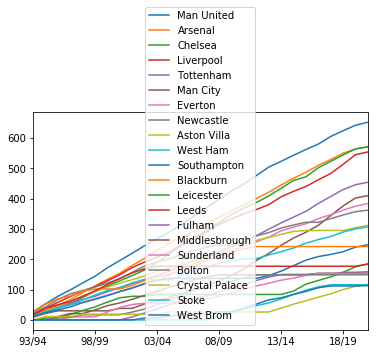

In [14]:
import matplotlib.pyplot as plot

df_to_plot = df_total_wins[df_total_wins["20/21"] > 100]
df_to_plot = df_to_plot.transpose()
df_to_plot.plot.line()
plot.show()